# Carhart Factor Model: Understanding the Factors #

In [29]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data
from capm_toolkit import capm_regression
from other_data_functions import rolling_calc_rstr

In [4]:
# We can download the premiums in the Fama and French website
momemtum_df = pd.read_csv(r'..\additional_data\famafrench_momentum.csv')
momemtum_df.set_index('Date', inplace=True)
momemtum_df.index = pd.to_datetime(momemtum_df.index)
momemtum_df = momemtum_df.div(100)
momemtum_df.columns = ['momentum']

momemtum_df

,momentum
Date,
2015-01-02,-0.0008
2015-01-05,0.0114
2015-01-06,0.0049
2015-01-07,0.0089
2015-01-08,0.0014
...,...
2025-04-24,-0.0032
2025-04-25,0.0047
2025-04-28,0.0011


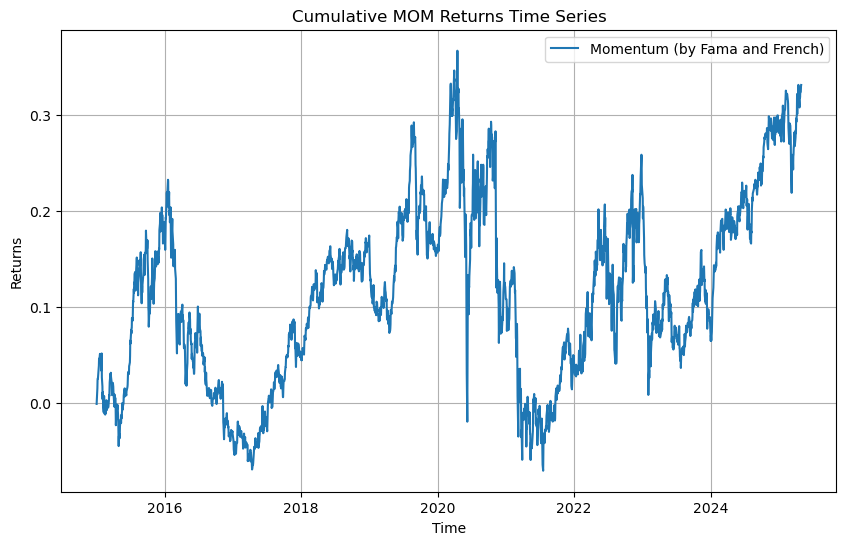

In [5]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(momemtum_df['momentum'].cumsum(), label='Momentum (by Fama and French)', alpha=1)

# Config
plt.title('Cumulative MOM Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [11]:
momentum_etf = get_market_data(
    ticker='MTUM', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

momentum_etf

Price,close,high,low,open,volume,returns
Date,,,,,,
2015-01-05,59.116482,59.610072,59.010710,59.610072,27400,-0.013035
2015-01-06,58.614052,59.513091,58.349625,59.389694,73600,-0.008535
2015-01-07,59.583588,59.742242,59.142881,59.275094,193100,0.016406
2015-01-08,60.799953,60.879278,60.094819,60.218217,109000,0.020209
2015-01-09,60.482632,61.090803,60.271087,61.090803,46900,-0.005233
...,...,...,...,...,...,...
2024-12-24,211.647858,211.707578,209.557552,209.925838,400400,0.012780
2024-12-26,211.946457,212.444147,210.423525,210.911267,365600,0.001410
2024-12-27,209.378387,210.801775,208.054529,210.801775,758600,-0.012191


In [13]:
# Calling Benchmark
benchmark = get_market_data(
    ticker='^GSPC', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

benchmark

Price,close,high,low,open,volume,returns
Date,,,,,,
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,-0.018447
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,-0.008933
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,0.011563
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,0.017730
2015-01-09,2044.810059,2064.429932,2038.329956,2063.449951,3364140000,-0.008439
...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,0.010982
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,-0.000406
2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000,-0.011117


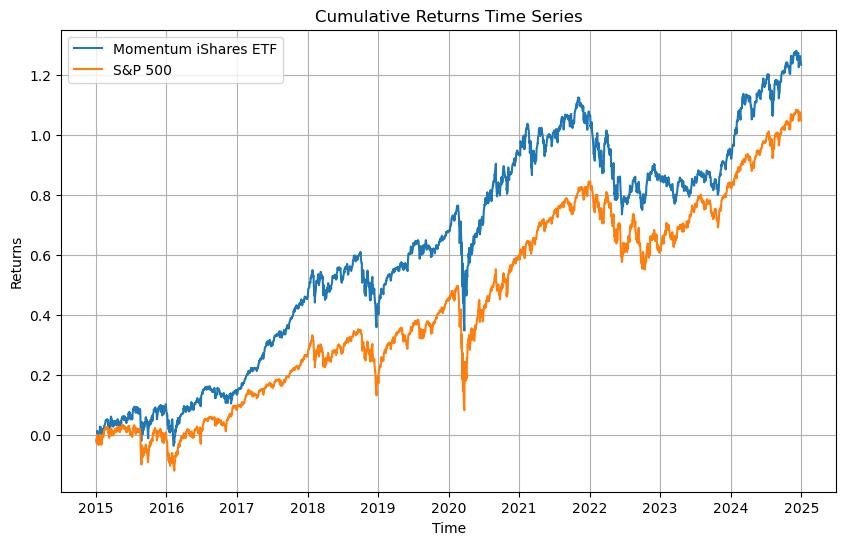

In [14]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(momentum_etf['returns'].cumsum(), label='Momentum iShares ETF', alpha=1)
plt.plot(benchmark['returns'].cumsum(), label='S&P 500', alpha=1)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

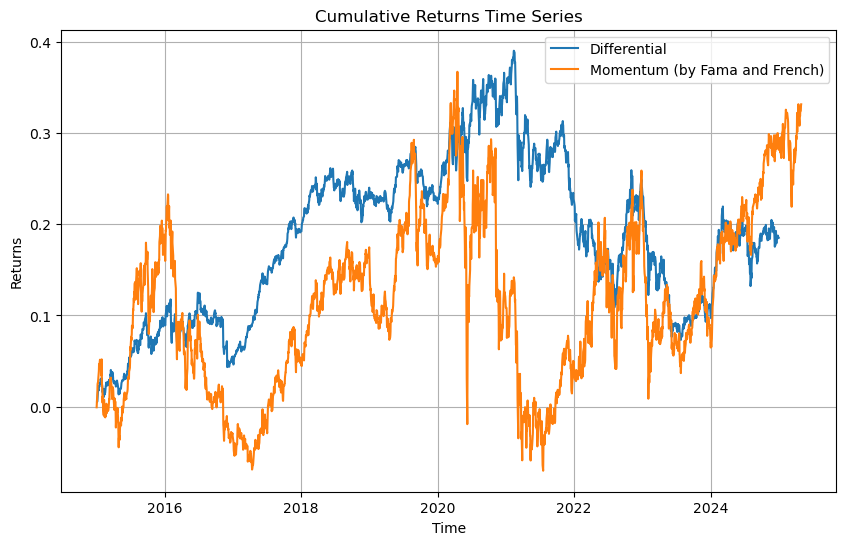

In [16]:
# Calculate Differential

differential = momentum_etf['returns'] - benchmark['returns']

# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(differential.cumsum(), label='Differential', alpha=1)
plt.plot(momemtum_df['momentum'].cumsum(), label='Momentum (by Fama and French)', alpha=1)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [20]:
model = capm_regression(
    momentum_etf['returns'],
    benchmark['returns'],
    window = len(momentum_etf['returns']),
    WLS=True
)

print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.794
Model:                            WLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     9680.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:18:41   Log-Likelihood:                 9253.5
No. Observations:                2515   AIC:                        -1.850e+04
Df Residuals:                    2513   BIC:                        -1.849e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.361e-05      0.000      0.201      0.8

In [23]:
residuals = model.resid
residuals.name = 'residuals'

residuals

Date
2015-01-05    0.005647
2015-01-06    0.000499
2015-01-07    0.004657
2015-01-08    0.002207
2015-01-09    0.003301
                ...   
2024-12-24    0.001620
2024-12-26    0.001798
2024-12-27   -0.000941
2024-12-30   -0.000877
2024-12-31   -0.000346
Name: residuals, Length: 2515, dtype: float64

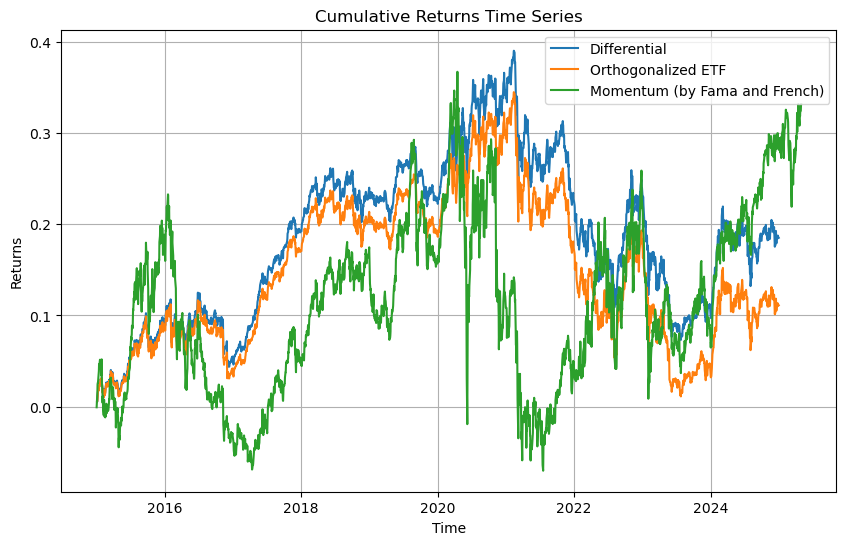

In [24]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(differential.cumsum(), label='Differential', alpha=1)
plt.plot(residuals.cumsum(), label='Orthogonalized ETF', alpha=1)
plt.plot(momemtum_df['momentum'].cumsum(), label='Momentum (by Fama and French)', alpha=1)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [27]:
returns_df = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns_df = returns_df.rename(columns={'Unnamed: 0': 'Date'})
returns_df.set_index('Date', inplace=True)
returns_df.index = pd.to_datetime(returns_df.index)

returns_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000222,-0.004989,-0.018352,-0.035215,-0.000721,-0.014722,-0.010052,...,-0.013900,0.000000,-0.017166,-0.011416,-0.027743,-0.064259,-0.020527,0.036625,-0.014177,-0.006022
2015-01-06,-0.015700,0.000094,-0.004962,-0.011421,-0.020350,-0.023753,-0.019911,-0.008324,-0.019973,-0.011709,...,-0.017255,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012351,-0.008513,-0.007231,-0.009804
2015-01-07,0.013184,0.013925,0.039621,0.008076,0.008190,0.010462,0.014920,0.008685,-0.002089,0.007747,...,0.016088,0.003045,0.028945,0.008598,0.010081,0.007857,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029534,0.037702,0.010404,0.020345,0.025135,0.017501,-0.014717,0.022681,0.024446,0.003522,...,0.019467,0.010722,0.011959,0.011532,0.016508,0.007517,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.014922,-0.000731,-0.008566,-0.007188,-0.009054,-0.011270,...,-0.011519,-0.001368,0.012422,-0.012361,-0.001411,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.002683,0.014782,0.004355,0.007822,0.012494,0.013291,...,0.009663,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,...,0.001981,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,...,-0.000630,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [30]:
# Create the RS DFs
relative_strenght_long = rolling_calc_rstr(
    returns_df,
    window_size=252,
    half_life=126
).T

relative_strenght_short = rolling_calc_rstr(
    returns_df,
    window_size=28,
    half_life=14,
    min_obs=13
).T

C:\Users\edgar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\edgar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\edgar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **pass

In [31]:
relative_strenght = (relative_strenght_long - relative_strenght_short).dropna()

relative_strenght

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2016-01-04,0.039354,-0.063982,-0.140384,-0.020450,0.239535,-0.046111,-0.459268,0.047118,0.117939,0.044608,...,0.159524,-0.040677,-0.906307,0.045435,-0.110163,0.044384,-0.145186,-0.112199,-0.377794,0.036708
2016-01-05,0.056262,-0.062940,-0.132119,-0.030465,0.240664,-0.063046,-0.429105,0.044035,0.137859,0.040991,...,0.161738,-0.047017,-0.883518,0.047593,-0.094876,0.073307,-0.136604,-0.131272,-0.374213,0.036551
2016-01-06,0.069902,-0.066313,-0.130979,-0.029168,0.247993,-0.030451,-0.426833,0.040605,0.146147,0.045983,...,0.169580,-0.047134,-0.846220,0.048631,-0.084189,0.072307,-0.133696,-0.128836,-0.365447,0.042046
2016-01-07,0.068469,-0.085871,-0.156199,-0.038485,0.239338,-0.045874,-0.428388,0.029695,0.139191,0.042870,...,0.153653,-0.052928,-0.864150,0.043609,-0.094254,0.066578,-0.149609,-0.140913,-0.384962,0.033021
2016-01-08,0.056763,-0.114480,-0.164925,-0.054371,0.224888,-0.062511,-0.422933,0.014265,0.119430,0.043575,...,0.139452,-0.064129,-0.883450,0.041700,-0.104998,0.056592,-0.159398,-0.146102,-0.413143,0.025201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,-0.055239,0.239504,0.011106,0.069135,-0.187692,-0.006030,-0.317668,0.290352,0.288957,0.289381,...,-0.093531,-0.106347,-0.049334,0.235218,0.066869,-0.046843,0.032562,-0.104667,0.379575,-0.110527
2024-12-26,-0.069821,0.251728,0.012497,0.064976,-0.197977,-0.010031,-0.318294,0.276527,0.271998,0.281488,...,-0.103249,-0.115362,-0.017456,0.233255,0.059996,-0.061363,0.036379,-0.114126,0.360249,-0.121648
2024-12-27,-0.080243,0.248788,0.000908,0.065702,-0.227988,-0.022827,-0.310168,0.269731,0.257634,0.287980,...,-0.133629,-0.121094,-0.029462,0.235933,0.051648,-0.066284,0.023390,-0.098733,0.346518,-0.126780
2024-12-30,-0.079723,0.256468,0.006500,0.067435,-0.237756,-0.017053,-0.317333,0.266078,0.259627,0.287468,...,-0.140436,-0.129412,-0.040263,0.233641,0.056593,-0.066560,0.025416,-0.100476,0.341555,-0.127927
